# Семинар # 3 – Линейные модели

In [1]:
import numpy.linalg as la
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
warnings.simplefilter('ignore')

%matplotlib inline

# 1. Постановка задачи

Линейная модель - это: $$ \hat{y} = f(x) = \theta_0*1 + \theta_1*x_1 + ... + \theta_n*x_n = \theta^T*X$$

Сгенерируем исскуственные данные, на основе функции:
$$f(x) = 4x+5$$

In [2]:
def lin_function(x):
    return 4 * x + 5

x_true = np.array([-2,2])
y_true = lin_function(x_true)

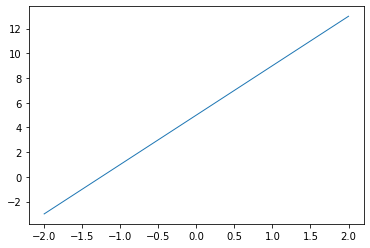

In [3]:
plt.plot(x_true, y_true, linewidth=1)
plt.show()

In [4]:
n = 100
x = np.random.rand(n, 1) * 4 - 2
e = np.random.rand(n, 1) * 4 - 2
y = lin_function(x) + e


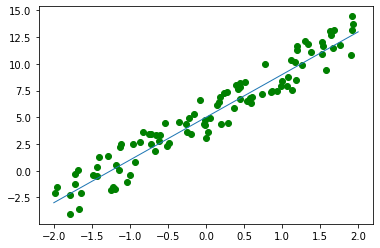

In [5]:
plt.scatter(x, y, color='g')
plt.plot(x_true, y_true, linewidth=1)
plt.show()

# 2. Метрики

Mean Absoulte Error:
$$MAE = \frac1N \sum_{i = 1}^N|f(x_i) - y_i| = \frac1N \sum_{i = 1}^N|\hat y_i - y_i| = \frac1N || \hat Y - Y||_1$$

Mean Sqared Error:
$$MSE = \frac1N \sum_{i = 1}^N(f(x_i) - y_i)^2 = \frac1N \sum_{i = 1}^N(\hat y_i - y_i)^2 = \frac1N ||\hat Y - Y||_2$$


Почему работаем с MSE?

# 3. Аналитический метод поиска минимума по МНК

$$MSE -> min $$

$$MSE = \frac1N \sum_{i = 1}^N(\hat y_i - y_i)^2 = \frac1N \sum_{i = 1}^N(\theta_i * x_i - y_i)^2 = \frac1N ||X \theta - Y||_2 = \frac1N (X\theta - Y)^T*(X\theta - Y) $$



$$ \frac{d}{d\theta}[\frac1N (X\theta - Y)^T*(X\theta - Y)] =  \frac1N \frac{d}{d\theta}[Y^TY - 2Y^TX\theta+\theta^TX^TX\theta]  $$

$$\hat \theta = \bigl(X^T \cdot X  \bigr)^{-1} \cdot X^T \cdot y $$

In [7]:
x_matrix = np.c_[np.ones((n, 1)), x]

In [8]:
%%time
thetha_matrix = la.inv(x_matrix.T @ x_matrix) @ x_matrix.T @ y

CPU times: total: 31.2 ms
Wall time: 39.7 ms


Обратите внимание на время работы

In [9]:
thetha_matrix.T[0].tolist()

[5.190918940797762, 4.0410207041473845]

In [10]:
print("Свободный член: {[0][0]:.7}".format(thetha_matrix.T))
print("Коэфициент: {[0][1]:.7}".format(thetha_matrix.T))

Свободный член: 5.190919
Коэфициент: 4.041021


In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

параметры

In [12]:
%%time
lr = LinearRegression()
lr.fit(x,y);

CPU times: total: 15.6 ms
Wall time: 20.5 ms


LinearRegression()

In [13]:
print("Свободный член: {:.7}".format(lr.intercept_[0]))
print("Коэфициент: {:.7}".format(lr.coef_[0][0]))

Свободный член: 5.190919
Коэфициент: 4.041021


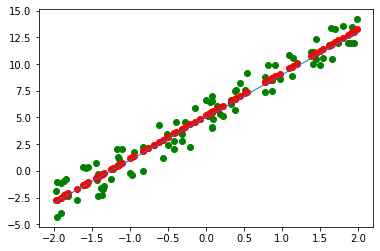

In [14]:
plt.scatter(x, y, color='g')
plt.scatter(x, lr.predict(x), color='r')
plt.plot(x_true, y_true, linewidth=1)
plt.show()

 # 4. Градиентный спуск

$$\theta^{(t+1)} = \theta^{(t)} - lr\cdot \nabla MSE(\theta^{(t)}),$$
где $lr$ — длина шага градиентного спуска (learning rate).

$$\nabla MSE(\theta)= \frac{2}{N} X^T \cdot \bigl(X \cdot \theta - Y \bigr) $$

In [102]:
def linear_backward(x, y, theta):
    gradients = (2 / y.shape[0] * x.T) @ (x @ theta - y) + la.norm(theta, axis=1, ord=2)
    
    return gradients

def update_theta(theta, gradient, lr):
    theta -= (lr * gradient)
    
    return theta 

In [16]:
x_matrix.shape

(100, 2)

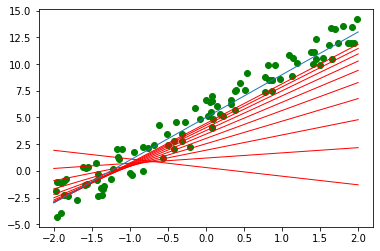

[[5.19091894]
 [4.0410207 ]]
CPU times: total: 219 ms
Wall time: 226 ms


In [17]:
%%time
lr = 0.1  # learning rate
n_iterations = 150


theta = np.random.randn(2,1)  # random initialization

plt.scatter(x, y, color='g')

for iteration in range(n_iterations):
    if iteration < 10:
        plt.plot(x_true, x_true*theta[1]+theta[0], linewidth=1, color='r')
        
    gradients = linear_backward(x_matrix, y, theta)
    theta = update_theta(theta, gradients, lr)

plt.plot(x_true, y_true, linewidth=1)
plt.show()

print(theta)

## Слишком маленький шаг обучения (learning rate)

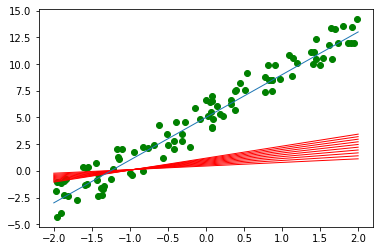

In [18]:
lr = 0.01  # learning rate
n_iterations = 100


theta = np.random.randn(2,1)  # random initialization

plt.scatter(x, y, color='g')

for iteration in range(n_iterations):
    if iteration < 10:
        plt.plot(x_true, x_true*theta[1]+theta[0], linewidth=1, color='r')
        
    gradients = linear_backward(x_matrix, y, theta)
    theta = update_theta(theta, gradients, lr)

plt.plot(x_true, y_true, linewidth=1)
plt.show()

## Слишком большой шаг обучения (learning rate)

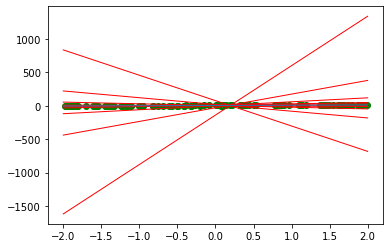

In [19]:
lr = 1.01  # learning rate
n_iterations = 100


theta = np.random.randn(2,1)  # random initialization

plt.scatter(x, y, color='g')

for iteration in range(n_iterations):
    if iteration < 10:
        plt.plot(x_true, x_true*theta[1]+theta[0], linewidth=1, color='r')
        
    gradients = linear_backward(x_matrix, y, theta)
    theta = update_theta(theta, gradients, lr)

plt.plot(x_true, y_true, linewidth=1)
plt.show()

## Уменьшение шага на каждой итерации

Предложите стратегию уменьшения шага обучения.

In [20]:
def dynamic_lr(iter_num, base_lr):
    
    base_lr = np.sqrt(base_lr / iter_num)
    
    return base_lr

In [24]:
lr = 1  # learning rate
n_iterations = 10000
grads = []

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = linear_backward(x_matrix, y, theta)
    grads.append(la.norm(gradients))
    
    cur_lr = dynamic_lr(iteration + 1, lr)
    theta = update_theta(theta, gradients, cur_lr)

print(theta)

[[5.19091894]
 [4.0410207 ]]




Learning rate - гипперпараметр, и можно воспользоваться GridSearchCV, однако чтобы не учить каждый раз такое кол-во итераций, мы можем измерять норму градиента, и прекращать спуск, когда он "затух"

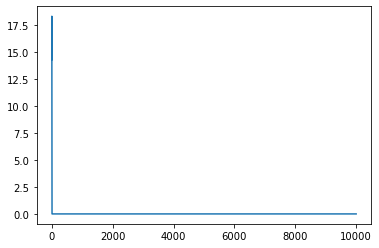

In [27]:
plt.plot(grads);

In [28]:
gradients

array([[2.08687234e-15],
       [1.43895312e-15]])

In [31]:
lr = 1  # learning rate
n_iterations = 1000
tol = 0.0001

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = linear_backward(x_matrix, y, theta)
    
    # Проверка нормы градиента для критерия останова
    if la.norm(gradients, ord=2) < 1e-4:
        break
        
    cur_lr = dynamic_lr(iteration + 1, lr)
    theta = update_theta(theta, gradients, cur_lr)

print('Градиент затух на {} итерации '.format(iteration))
print(theta)

Градиент затух на 9 итерации 
[[5.19092376]
 [4.04101551]]


__Реализация в Scikit-Learn отсутствует__
  
  

# 5. Cтохастический градиентный спуск  

у среднего случайных подвыборок то же что и у всех данных

In [33]:
!pip install tqdm
from tqdm import auto

In [38]:
n_epochs = 100

theta = np.random.randn(2,1)  # random initialization

for epoch in auto.tqdm(range(n_epochs)):
    for i in range(n):
        # Случайная подвыборка
        
        ind = np.random.randint(0, y.shape[0], size=5)
        
        xi = x_matrix[ind]
        yi = y[ind]
        gradients = linear_backward(xi, yi, theta)
    
        if la.norm(gradients, ord=2) < 1e-4:
            break

        cur_lr = dynamic_lr(iteration, lr)
        theta = update_theta(theta, gradients, cur_lr)
        
print(theta)

  0%|          | 0/100 [00:00<?, ?it/s]

[[4.98175923]
 [4.61937627]]


In [39]:
gradients

array([[-1.8104852 ],
       [-1.62738267]])

# 6. Пакетный градиентный спуск  

In [42]:
n_epochs = 100
theta = np.random.randn(2,1)  # random initialization

batch_size = 5

for epoch in auto.tqdm(range(n_epochs)):
    for i in range(0, n, batch_size):        
        # Пакет (батч)
        # <Ваш код>
        xi = x_matrix[i:i + batch_size]
        yi = y[i: i + batch_size]
        gradients = linear_backward(xi, yi, theta)
    
        if la.norm(gradients, ord=2) < 1e-4:
            break

        cur_lr = dynamic_lr(iteration, lr)
        theta = update_theta(theta, gradients, cur_lr)
        
print(theta)

  0%|          | 0/100 [00:00<?, ?it/s]

[[5.507046  ]
 [3.85903948]]


In [43]:
from sklearn.linear_model import SGDRegressor

In [44]:
sgd = SGDRegressor(tol=0.0001)
sgd.fit(x,y)
sgd.intercept_, sgd.coef_

(array([5.1864669]), array([4.03816573]))

# 7. Функции потерь в регрессии

In [45]:
with open('data_preprocessed.json') as file:
    X = pd.read_json(file)

In [46]:
X_subset = X[[7, 15]].values
X_subset_modified = np.vstack((X_subset, [[1, 90], [2, 50]]))

In [47]:
def scatter_points_and_plot_line_MSE(X_subset):
    plt.scatter(X_subset[:, 0], X_subset[:, 1])
    lr = LinearRegression()
    lr.fit(X_subset[:, 0][:, None], X_subset[:, 1])
    grid = np.linspace(0, 2, 100)
    line = lr.predict(grid[:, None])
    plt.plot(grid, line)

Text(0.5, 0, 'x')

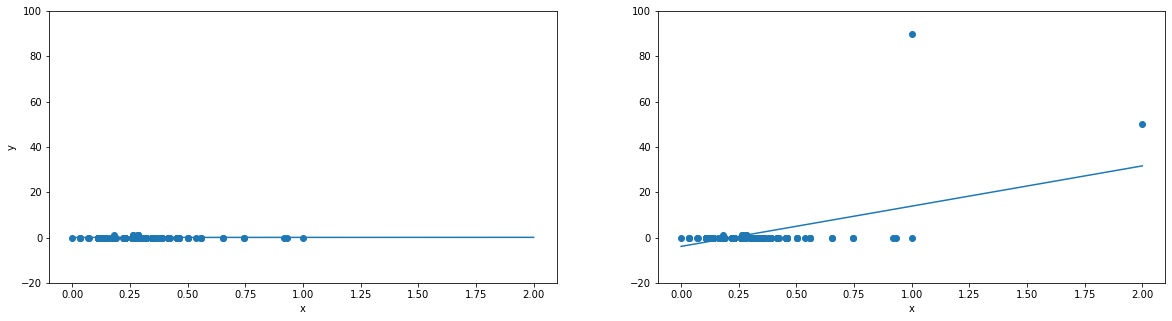

In [48]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
scatter_points_and_plot_line_MSE(X_subset)
plt.ylim(-20, 100)
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
scatter_points_and_plot_line_MSE(X_subset_modified)
plt.ylim(-20, 100)
plt.xlabel("x")

Из-за шумовых объектов прямая достаточно сильно изменила наклон. Поэтому вместо MSE часто используют Mean Absoulte Error:
$$L(y_i, a(x_i)) = |y_i - a(x_i)|$$

Теперь обучим регрессию, оптимизируя MAE. В sklearn такая регрессия не реализована, но можно использовать модуль statsmodels

In [49]:
!pip install statsmodels==0.11.1
import statsmodels.api as sm
import statsmodels.formula.api as smf

^C


ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
plt.figure(figsize=(20, 5))
plt.ylabel("y")
mod = smf.quantreg('f15 ~ f7', pd.DataFrame(data=X_subset_modified, columns=["f7", "f15"])) # задаеем зависимость и передаем данные
res = mod.fit(q=0.5)
plt.scatter(X_subset_modified[:, 0], X_subset_modified[:, 1])   # визуализируем точки
grid = np.linspace(0, 2, 100)
plt.plot(grid, grid * res.params["f7"] + res.params["Intercept"])   # визуализируем прямую
plt.ylim(-20, 100)
plt.xlabel("x")

Прямая не изменила направление из-за выбросов.

Попробуем добавить больше шумовых объектов:

In [ ]:
X_subset_modified_twice = np.vstack((
    X_subset_modified, 
    np.random.randint(5, size=60).reshape(-1, 2) * [1, 30],
))

In [ ]:
plt.figure(figsize=(20, 5))
plt.ylabel("y")
mod = smf.quantreg('f15 ~ f7', pd.DataFrame(data=X_subset_modified_twice, columns=["f7", "f15"])) # задаеем зависимость и передаем данные
res = mod.fit(q=0.5)
plt.scatter(X_subset_modified_twice[:, 0], X_subset_modified_twice[:, 1])   # визуализируем точки
grid = np.linspace(0, 4, 200)
plt.plot(grid, grid * res.params["f7"] + res.params["Intercept"])   # визуализируем прямую
plt.ylim(-20, 100)
plt.xlabel("x")

Прямая изменила наклон, когда мы добавили 30 (почти 15%) шумовых точек.

# 7. Мультиколлинеарность и регуляризация

In [51]:
# !pip install seaborn
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Для оценка качества работы наших алгоритмов будем использовать коэфициент детерминации:

$$R^2 = 1 - \frac{\sum_i (y_i - a(x_i))^2}{\sum_i (y_i - \overline{y}_i)^2}$$


## Решение задачи МНК

In [52]:
def my_linear_regression(X_train, Y_train):
    return np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

In [53]:
def predict(X, w):
    return np.dot(X, w)

## Загрузим датасет

https://habrahabr.ru/post/206306/

In [54]:
data = pd.read_csv('energy_efficiency.csv')

Для примера решения задачи прогнозирования, я взял набор данных Energy efficiency из крупнейшего репозитория UCI.   

В нем $X_1 ... X_8$ — характеристики помещения на основании которых будет проводиться анализ, а $y_1,y_2$ — значения нагрузки, которые надо спрогнозировать.
- $X_1$	Относительная компактность
- $X_2$	Площадь
- $X_3$	Площадь стен
- $X_4$	Площадь потолка	
- $X_5$	Общая высота	
- $X_6$	Ориентация
- $X_7$	Площадь остекления	
- $X_8$	Распределенная площадь остекления	
- $y_1$	Нагрузка при обогреве
- $y_2$	Нагрузка при охлаждении

In [55]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## Посмотрим на скоррелированность данных

In [56]:
data.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889430,0.895785
X6,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
X7,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269842,0.207505
X8,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-2.586763e-03,2.698417e-01,8.736846e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


<AxesSubplot:>

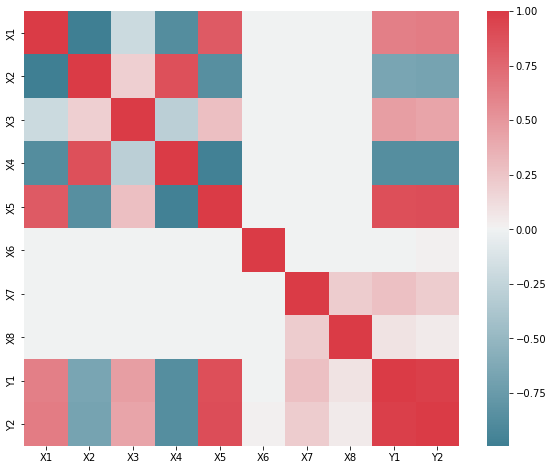

In [57]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, square=True, ax=ax, cmap=sns.diverging_palette(220, 10, as_cmap=True))

<AxesSubplot:>

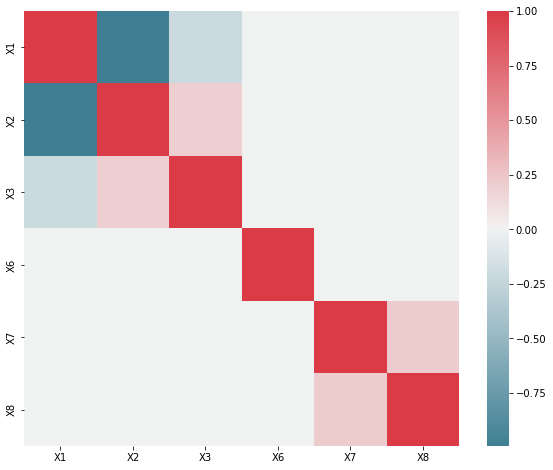

In [66]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.drop(['X4', 'X5', 'Y1','Y2'], axis=1).corr()
sns.heatmap(corr, square=True, ax=ax, cmap=sns.diverging_palette(220, 10, as_cmap=True))

Видим, что x1 скоррелирован с x2, а x4 с x5. Из-за этого матрица $X^{T}*X$ необратима.

## Посмотрим как на таких данных отработает наша линейная регрессия

Разобьем выборку на train и test

In [74]:
X = data.drop(['X4', 'X5', 'Y1','Y2'], axis=1)
y = data['Y1']

In [75]:
X.shape, y.shape

((768, 6), (768,))

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучим регрессию и посмотрим на качество

In [77]:
w = my_linear_regression(X_train, y_train)

In [78]:
y_train_pred = predict(X_train, w)
print("Train MSE: ", mean_squared_error(y_train, y_train_pred))
print("Train R2: ", r2_score(y_train, y_train_pred))

Train MSE:  14.676590618610792
Train R2:  0.8545776686137627


In [79]:
def mse(y_train, y_train_pred):
    return sum((y_train-y_train_pred)**2)/len(y_train)

In [80]:
y_test_pred = predict(X_test, w)
print("Test MSE: ", mean_squared_error(y_test, y_test_pred))
print("Test R2: ", r2_score(y_test, y_test_pred))

Test MSE:  17.127288693804505
Test R2:  0.8356817345793681


Как-то не очень

## Попробуем убрать скоррелированные признаки

In [81]:
# Выделите данные для обучения без скорредированных признаков
X = data.drop(['X4', 'X5', 'Y1','Y2'], axis=1)
y = data['Y1']

In [82]:
X.shape, y.shape

((768, 6), (768,))

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучим регрессию и посмотрим на качество

In [84]:
w = my_linear_regression(X_train, y_train)

In [85]:
y_train_pred = predict(X_train, w)
print("Train MSE: ", mean_squared_error(y_train, y_train_pred))
print("Train R2: ", r2_score(y_train, y_train_pred))

Train MSE:  14.676590618610792
Train R2:  0.8545776686137627


In [86]:
y_test_pred = predict(X_test, w)
print("Test MSE: ", mean_squared_error(y_test, y_test_pred))
print("Test R2: ", r2_score(y_test, y_test_pred))

Test MSE:  17.127288693804505
Test R2:  0.8356817345793681


Юху! Получили алгоритм с хорошим качеством

## Реализуем линейную регрессию с L2 регуляризацией

In [94]:
def my_linear_regression(X_train, Y_train, l2=0):
    
    return la.inv(X_train.T @ X_train + l2 ** 2 * np.eye((X_train.T @ X_train).shape[0])) @ X_train.T @ Y_train

Обучим регрессию с регуляризацией и посмотрим на качество

In [95]:
X = data.drop(['Y1','Y2'], axis=1)
y = data['Y1']

In [96]:
X.shape, y.shape

((768, 8), (768,))

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
w = my_linear_regression(X_train, y_train, l2=0.001)

In [99]:
y_train_pred = predict(X_train, w)
print("Train MSE: ", mean_squared_error(y_train, y_train_pred))
print("Train R2: ", r2_score(y_train, y_train_pred))

Train MSE:  8.574116345229587
Train R2:  0.9150437577158399


In [100]:
y_test_pred = predict(X_test, w)
print("Test MSE: ", mean_squared_error(y_test, y_test_pred))
print("Test R2: ", r2_score(y_test, y_test_pred))

Test MSE:  9.424321859576459
Test R2:  0.9095835745857708


Этого же эффекта (отсутствие переобучения) мы добились, добавив регуляризацию.

In [101]:
w

0   -19.336720
1    -0.004582
2     0.034093
3    -0.018304
4     5.193319
5    -0.018834
6    20.269047
7     0.217984
dtype: float64